Student Name: Syed Ahmad

# **Foundations of Data Science Fall 2022 - Homework 0 (30 points)**

---



### **Part 1: Pre-class survey (5 Points)**

---


- Fill in [this survey] which will help our course team understand student backgrounds and interests.


### **Part 2: Case study (5 Points)**

---


- Read [this article](https://drive.google.com/file/d/1zRxm8WrOtdeT1pQKgKcjzd3J1x8GLTtb/view?usp=sharing) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include aspects of the Data Science Workflow that you see as relevant to solving the problem.  Be precise but concise.


Place your answer here!

**Part 2 Response**

The following steps may have been involved to solve Target's problem:

1. Setting up the problem - Target already has a Marketting Analytics Department which is reponsible for analysing users buying habits and presenting them with relevent advertisements. In this case, the goal is to create a prediction model to find out if a woman shopper is pregnant and how many months before they delivery the baby so that they can present them with relevent advertisements at the correct time.


2. Data Sourcing - The initial data to analyse and train the model comes from targets "baby shower registry". This will provide the data on what products these women purchased and what their shopping habits are. Target may also purchase external data like socio-economical, financial and ethnicity data from outside sources to enrich the traning data. The feasibility of what can and cannot be used may be checked as part of EDA (Exploratory data analysis) step before we start moving the data into next steps.


3. ETL - This involves Joining, Cleaning and Transforming the data. 
First step is to join the external and internal data through means of Primary Keys, which may be the Customer ID or email. Then the data needs to be imputed and standardized into a unified model which can be used for model training. These steps can be setup as an ETL pipeline with different steps.


4. Model Training - Next step is analyse and select best features for Model Traning. After which, Target can train various Classification and Regression models which can predict is a user is pregnant or not based on the feature values such as items bought, frequency and time of purchase, etc. 


5. Scoring and Validation - The model can be validated using techniques like k-Fold Validation. Afterwards, using the models obtained in the last steps, target can run precictions on existing users which are not part of "baby shower registry" and check the validity of results.


### **Part 3: Exploring data in the command line (4 Points - 1 Point Each)**

---




*   For this part we will be using the data file `"loansData.csv"`. This file 
consists of records that pertain to some loan records in a local bank. There are 15 comma separated columns in this order: 
>> `CustNUm`, `Amount.Requested`,	`Amount.Funded.By.Investors`,	`Interest.Rate`,	`Loan.Length`,	`Loan.Purpose`,	`Debt.To.Income.Ratio`,	`State`,	`Home.Ownership`,	`Monthly.Income`,	`FICO.Range`,	`Open.CREDIT.Lines`,	`Revolving.CREDIT.Balance`,	`Inquiries.in.the.Last.6.Months`, and	`Employment.Length`. 
*   These fields contain data of type `int`, `float`, and `string`, and you can also locate a file `"data/loansData_columns.csv"`in the data folder containing all the column names for easy reference.  Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in iPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.


>>**1**\. *How many records (lines) are in this file?*




In [ ]:
# Place your code here
!wc -l data/loansData.csv

2501 data/loansData.csv


>>**2**\. *How many unique `State` (the 8th field) are in this file? (hint: consider the 'cut' command and use pipe operator '|')*



In [ ]:
# Place your code here
# using tail to ignore first line which contains header information
!tail -n+2 data/loansData.csv | cut -d "," -f 8 | sort | uniq | wc -l

46


>>**3**\. *Rank all domains by the number of `Loan.Purpose` (the 6th field) they requested in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).*



In [ ]:
# Place your code here
!tail -n+2 data/loansData.csv| cut -d "," -f 6 | sort | uniq -c | sort -nr

   1307 "debt_consolidation"
    444 "credit_card"
    201 "other"
    152 "home_improvement"
    101 "major_purchase"
     87 "small_business"
     50 "car"
     39 "wedding"
     30 "medical"
     29 "moving"
     21 "vacation"
     20 "house"
     15 "educational"
      4 "renewable_energy"


>>**4**\. *List all records which have `FICO.Range` (the 11th field) from 815-819. (hint: this can be done using 'grep')*




In [ ]:
# Place your code here
!grep -w "815-819" data/loansData.csv 

"64884",9000,9000,"6.03%","36 months","vacation","5.58%","NJ","MORTGAGE",9583.33,"815-819",11,675,0,"n/a"
"55501",8000,8000,"6.03%","36 months","debt_consolidation","4.51%","OR","MORTGAGE",3500,"815-819",9,6737,0,"10+ years"
"93374",16500,16500,"6.03%","36 months","debt_consolidation","22.65%","CA","MORTGAGE",5416.67,"815-819",17,14835,0,"10+ years"
"90568",4800,4800,"6.62%","36 months","car","10.42%","TX","MORTGAGE",7291.67,"815-819",14,0,0,"< 1 year"
"80302",16800,16800,"7.90%","60 months","debt_consolidation","3.34%","FL","MORTGAGE",10666.67,"815-819",7,4757,0,"10+ years"
"5906",12800,12787.71,"8.94%","36 months","debt_consolidation","0.18%","AZ","MORTGAGE",2833.33,"815-819",7,306,0,"4 years"


### **Part 4: Dealing with data Pythonically (16 Points)**

---



In [ ]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

>>**1**\. **(1 Point)** *Load the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.*




In [ ]:
# Place your code here
ads = pd.read_csv("data/new_ads_dataset.tsv",sep='\t', header=0)
ads.head()

,is_video_user,video_freq,call_freq,video_interval,call_interval,expected_video_time,expected_call_time,last_bill,next_bill,multiple_video,multiple_carrier,uniq_urls,num_texts,is_churn
0,0,NaN,1,0,0.0,0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0,0.0,0,0.0000,72,72,0,0,154,1100,0
2,0,NaN,1,0,0.0,0,0.0000,5,5,0,0,4,12,0
3,0,NaN,1,0,0.0,0,0.0000,6,6,0,0,150,539,0
4,0,NaN,2,0,0.5,0,-101.1493,101,101,0,1,103,362,0


>>**2**\. **(4 Points)** *Write a Python function called `getDfSummary()` that does the following:*
- *Takes as input a data frame*
- *For each variable in the data frame calculates the following features:*
  - *`number_nan` to count the number of missing not-a-number values*
  - *Ignoring missing, NA, and Null values:*
    - *`number_distinct` to count the number of distinct values a variable can take on*
    - *`mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles*
- *All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.*
- Returns this new data frame containing all of the summary information
*italicized text*
>>**Hint:** *The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.*



In [ ]:
def getDfSummary(input_data):
    columns = list(input_data.columns)

    # store each feature of data columns in below lists
    nanCounts   = []
    numDistinct = []
    meanValues  = []
    maxValues   = []
    minValues   = []
    percent25   = []
    percent50   = []
    percent75   = []
    stdValues   = []

    # iterate through each column to calculate the feature values
    for col in columns:      
      colFiltered = input_data[input_data[col].notnull()][col]
      describeCol = colFiltered.describe()

      nanCounts.append(input_data[col].isna().sum())
      numDistinct.append(len(colFiltered.unique()))
      meanValues.append(describeCol['mean'])
      maxValues.append(describeCol['max'])
      minValues.append(describeCol['min'])
      percent25.append(describeCol['25%'])
      percent50.append(describeCol['50%'])
      percent75.append(describeCol['75%'])
      stdValues.append(describeCol['std'])

    result = pd.DataFrame()
    result['number_nan'] = nanCounts
    result['number_distinct'] = numDistinct
    result['mean'] = meanValues
    result['max'] = maxValues
    result['min'] = minValues
    result['std'] = stdValues
    result['25%'] = percent25
    result['50%'] = percent50
    result['75%'] = percent75
    result.index = columns

    return result

>>**3**\. **(1 Point)** *How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.*

>>**Hint:** *`%timeit getDfSummary(ads)`*



In [ ]:
# Place your code here
print('Time taken for getDfSummary function to work on the ads data frame: \n')
%timeit getDfSummary(ads)
getDfSummary(ads)

Time taken for getDfSummary function to work on the ads data frame: 

106 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,2,0.042632,1.00000,0.0000,0.202027,0.0,0.0,0.000000
video_freq,52257,10,1.240653,15.00000,1.0000,0.782228,1.0,1.0,1.000000
call_freq,0,64,1.852777,84.00000,0.0000,2.921820,1.0,1.0,2.000000
video_interval,0,121,2.570533,120.00000,0.0000,14.162418,0.0,0.0,0.000000
call_interval,0,5886,5.825610,184.91670,0.0000,17.595442,0.0,0.0,0.104167
expected_video_time,0,134,-0.494174,55.00000,-78.0000,8.411089,0.0,0.0,0.000000
expected_call_time,0,15135,-10.210786,91.40192,-187.6156,31.879722,0.0,0.0,0.000000
last_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
next_bill,0,189,64.729335,188.00000,0.0000,53.476658,18.0,51.0,105.000000
multiple_video,0,2,0.021563,1.00000,0.0000,0.145253,0.0,0.0,0.000000


>>**4**\. **(2 Points)** *Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?*




In [ ]:
# Place your code here
summary = getDfSummary(ads)
summary[summary['number_nan'] > 0]

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
video_freq,52257,10,1.240653,15.0,1.0,0.782228,1.0,1.0,1.0


>>**5**\. **(4 Points)** *For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?*

>>**Hint:** *create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?*

>>---



**Response**

The data in *video_freq* field coorelates with two other columns *is_video_user* and *video_interval*. 

If is_video_user is 0, then video_freq is NaN and video_interval is also 0. 

If the user is not a video user, it doesn't make sense to refer to these columns but for consistency we can fill the value in *video_freq* to 0 to avoid errors when doing any modelling.

In [ ]:
# Place your code and response here
adsWithNanOnly = ads[ads['video_freq'].isna()]
summaryWithNaN = getDfSummary(adsWithNanOnly)
summaryWithNaN

,number_nan,number_distinct,mean,max,min,std,25%,50%,75%
is_video_user,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
video_freq,52257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_freq,0,48,1.651549,84.00000,1.0000,2.147955,1.0,1.0,2.000000
video_interval,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
call_interval,0,5112,5.686388,184.91670,0.0000,17.623555,0.0,0.0,0.041667
expected_video_time,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000
expected_call_time,0,13351,-9.669298,91.40192,-187.6156,31.239030,0.0,0.0,0.000000
last_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
next_bill,0,189,65.741317,188.00000,0.0000,53.484622,19.0,52.0,106.000000
multiple_video,0,1,0.000000,0.00000,0.0000,0.000000,0.0,0.0,0.000000


>>**6**\. (**2 Points)** *Which variables are binary?*




In [ ]:
# Place your code here
def checkBinary(col):
  col.dropna(inplace=True)
  return sorted(col.unique()) == [0,1]

print('Binary variables are as follows: \n')
for col in ads.columns:
  if checkBinary(ads[col]):
    print(col)

Binary variables are as follows: 

is_video_user
multiple_video
multiple_carrier
is_churn


>>**7**\. **(0.5 Point)** *Let's take a deeper look into one of the features, the `num_texts`, which stands for the number of text messages. Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib. Draw a histogram graph of `num_texts` from the dataframe `ads`, set the title of the graph as `'Histogram of Number of Texts'`.*

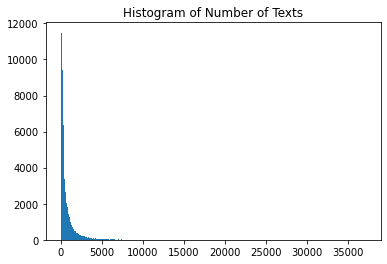

In [ ]:
# Place your code here
plt.hist(ads['num_texts'], bins=350)
plt.title('Histogram of Number of Texts')
plt.show()

>>**8**\. **(1.5 Point)** *How would you characterize the shape of this distribution? Is there anything we can do to the texts variable to make the distribution more bell curved?*

>>**Hint:** *Let's create a new column in the dataframe called `'log_num_texts'` and print a histogram `'Histogram of Log(Num Texts)'` of it. What might be some advantages of making such a transformation?*

**Response**

The distribution for this feature is right skewed with 75% of values less than 800. Since the values of the feature are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance when training a Machine Learning model using this data.

Whereas Log(num_texts) is more Normally Distributed and hence making this transformation will help have more consistent results when traning a model or making any inference using this feature.

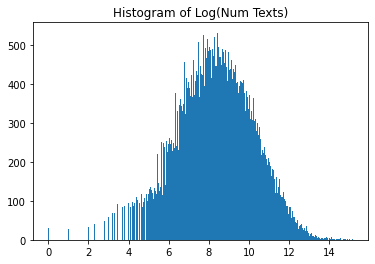

In [ ]:
# Place your code and response here
ads['log_num_texts'] = np.log2(ads['num_texts'])
plt.hist(ads['log_num_texts'], bins=350)
plt.title('Histogram of Log(Num Texts)')
plt.show()

##  **End of Homework 0**